# **Import Data**

#### Import library

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

#### Import database

In [3]:
df_raw_train = pd.read_csv('C:/Users/Rafael/Code/Projetos/Kaggle/Digit Recognizer/train.csv')
df_raw_test = pd.read_csv('C:/Users/Rafael/Code/Projetos/Kaggle/Digit Recognizer/test.csv')

df_raw_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pre-processing dataframe

#### Get values

In [4]:
train_images = df_raw_train.copy(deep = True)
train_label = train_images['label']
train_images = train_images.drop('label', axis=1)

test_images = df_raw_test.copy(deep = True)

#### Reshape data from 1D to 2D

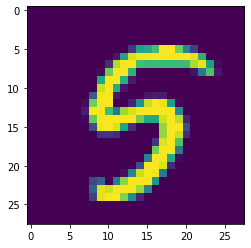

In [5]:
train_images = train_images.values.reshape(len(train_images),28,28,1)
test_images = test_images.values.reshape(len(test_images),28,28,1)

plt.imshow(train_images[8][:,:,0])

#### Normalize values (Gray Scale)

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

# **Machine Learning**

In [20]:
# import tensorflow as tf
from tensorflow import keras

print(f'TF version: {tf.__version__}')
print(f'Keras version: {keras.__version__}')

print(f'GPUs Available: {len(tf.config.experimental.list_physical_devices('GPU'))}')

TF version: 2.2.0
Keras version: 2.3.0-tf
Num GPUs Available:  1


## Create Model

In [8]:
# Only chose onve value from range in filter
# Pick best values from kernel size

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),   
            kernel_size = hp.Choice('conv_1_kernel', values = [3,5,7]),                
            activation = 'relu',
            input_shape = (28,28,1)
        ),
        keras.layers.Conv2D(
            filters = hp.Int('conv_2_filter', min_value = 32, max_value = 128, step = 16),
            kernel_size = hp.Choice('conv_2_kernel', values = [3,5,7]),
            activation = 'relu'
        ),
#         keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(
            filters = hp.Int('conv_3_filter', min_value = 32, max_value = 128, step = 16),
            kernel_size = hp.Choice('conv_3_kernel', values = [3,5,7]),
            activation = 'relu'
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units = hp.Int('dense_1_units', min_value = 32, max_value = 128, step = 16),
            activation = 'relu'
        ),
        keras.layers.Dense(10, activation = 'softmax')     
        ])

    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
  
    return model

#### Fine Tuning

In [24]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search = RandomSearch(build_model, max_trials = 5, objective = 'val_accuracy')


#  Number of tries and hyperparameters used (More tries, more time)
# with tf.device('/GPU:0'):
tuner_search.search(train_images, train_label, epochs = 3, validation_split = 0.1, verbose = 2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/3
1182/1182 - 20s - loss: 2.3858 - accuracy: 0.1070 - val_loss: 2.3016 - val_accuracy: 0.1002
Epoch 2/3
1182/1182 - 20s - loss: 2.3024 - accuracy: 0.1079 - val_loss: 2.3017 - val_accuracy: 0.1043
Epoch 3/3
1182/1182 - 20s - loss: 2.3025 - accuracy: 0.1058 - val_loss: 2.3036 - val_accuracy: 0.1090


Epoch 1/3
1182/1182 - 12s - loss: 0.2651 - accuracy: 0.9206 - val_loss: 0.1143 - val_accuracy: 0.9645
Epoch 2/3
1182/1182 - 12s - loss: 0.1113 - accuracy: 0.9658 - val_loss: 0.0987 - val_accuracy: 0.9721
Epoch 3/3
1182/1182 - 12s - loss: 0.0997 - accuracy: 0.9689 - val_loss: 0.1416 - val_accuracy: 0.9612


Epoch 1/3
1182/1182 - 11s - loss: 2.4048 - accuracy: 0.1099 - val_loss: 2.3030 - val_accuracy: 0.1090
Epoch 2/3
1182/1182 - 11s - loss: 2.3026 - accuracy: 0.1081 - val_loss: 2.3034 - val_accuracy: 0.1002
Epoch 3/3
1182/1182 - 11s - loss: 2.3026 - accuracy: 0.1092 - val_loss: 2.3022 - val_accuracy: 0.0945


Epoch 1/3
1182/1182 - 17s - loss: 0.1301 - accuracy: 0.9607 - val_loss: 0.0455 - val_accuracy: 0.9869
Epoch 2/3
1182/1182 - 17s - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0443 - val_accuracy: 0.9862
Epoch 3/3
1182/1182 - 17s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0347 - val_accuracy: 0.9912


INFO:tensorflow:Oracle triggered exit


#### Build model with best hyperparameters

In [10]:
model = tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 80)        23120     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        46144     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1638464   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,709,210
Trainable params: 1,709,210
Non-trainable params: 0
______________________________________________

#### Train model

In [11]:
model.fit(train_images, train_label, epochs=10, initial_epoch=0, validation_split=0.1, verbose=2)

Epoch 1/10
1182/1182 - 11s - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0468 - val_accuracy: 0.9860
Epoch 2/10
1182/1182 - 11s - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0446 - val_accuracy: 0.9869
Epoch 3/10
1182/1182 - 11s - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 4/10
1182/1182 - 11s - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0788 - val_accuracy: 0.9812
Epoch 5/10
1182/1182 - 11s - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0486 - val_accuracy: 0.9886
Epoch 6/10
1182/1182 - 11s - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0575 - val_accuracy: 0.9874
Epoch 7/10
1182/1182 - 11s - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0569 - val_accuracy: 0.9886
Epoch 8/10
1182/1182 - 11s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0449 - val_accuracy: 0.9900
Epoch 9/10
1182/1182 - 11s - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0759 - val_accuracy: 0.9869
Epoch 10/10
1182/1182 - 11s - loss: 0.0054 - accuracy: 0.9984 - val_loss:

#### Predict

In [12]:
label_test = model.predict(test_images, batch_size=200)

In [13]:
label_pred = pd.DataFrame(label_test)
label_pred = pd.DataFrame(label_pred.idxmax(axis = 1))

In [14]:
kaggle_columns = ['ImageId', 'Label']
kaggle_submission = pd.DataFrame(columns = kaggle_columns)

kaggle_submission['ImageId'] = range(1, len(df_raw_test) + 1)
kaggle_submission['Label'] = label_pred

kaggle_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [15]:
kaggle_submission.to_csv('C:/Users/Rafael/Code/Projetos/Kaggle/Digit Recognizer/Kaggle_submission.csv', index = False)